# Pre-processing

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [41]:
sales = pd.read_csv("../data/raw/sales.csv", header=0, delimiter=",")
sku = pd.read_csv("../data/raw/sku.csv", header=0, delimiter=",")

In [42]:
print(sales.head())
print(sales.describe())
print()
print(f"Shape of data is: {sales.shape}")
print(print(f"Shape of data with dropna() is: {sales.dropna().shape}"))
print(f"columns: {sales.columns}")
print(sales.info())
print((sales.price==0).value_counts())
print((sales.sales==0).value_counts())

           ID  geoCluster    SKU        date  price  sales
0  RR27956459          92  32485  2021-07-05  38.29    4.0
1  RR27956474          92  32549  2021-07-05  89.39    0.5
2  RR27956489         112  32485  2021-05-27  45.39    3.7
3  RR27956490         112  32485  2021-05-28    NaN    NaN
4  RR27956491         112  32485  2021-05-29    NaN    NaN
         geoCluster           SKU          price          sales
count  4.605985e+06  4.605985e+06  778366.000000  778366.000000
mean   2.220031e+03  3.671353e+05      67.490666       3.593748
std    2.459249e+02  3.005135e+05      85.631611       4.627158
min    9.200000e+01  2.400000e+01       0.000000       0.001000
25%    2.049000e+03  3.946500e+04      24.190000       1.000000
50%    2.158000e+03  3.637130e+05      38.490000       2.500000
75%    2.269000e+03  6.427000e+05      61.890000       4.000000
max    3.230000e+03  8.381370e+05    7246.890000     801.000000

Shape of data is: (4605985, 6)
Shape of data with dropna() is: (77836

In [43]:
sales["date"] = sales["date"].astype("datetime64")
sales = sales.set_index("date")
sales

,ID,geoCluster,SKU,price,sales
date,,,,,
2021-07-05,RR27956459,92,32485,38.29,4.0
2021-07-05,RR27956474,92,32549,89.39,0.5
2021-05-27,RR27956489,112,32485,45.39,3.7
2021-05-28,RR27956490,112,32485,NaN,NaN
2021-05-29,RR27956491,112,32485,NaN,NaN
...,...,...,...,...,...
2021-07-01,RR55912525,3230,711838,28.49,5.0
2021-07-02,RR55912526,3230,711838,28.49,11.0
2021-07-03,RR55912527,3230,711838,28.49,2.0


Sales is our target variable that we will want to predict.

In [44]:
print(sku.head())
print(sku.describe())

     SKU                  Category  \
0     24               Pomegranate   
1    208          Water, sparkling   
2   1008  Water, import, sparkling   
3  16649              Water, still   
4  20872          Water, sparkling   

                                            Type  brandId  lagerUnitQuantity  \
0            Tropical fruit — Pomegranate— Plain      NaN                1.0   
1  Therapeutic-table water — PET — from 1 to 2 L   1241.0                1.5   
2       Therapeutic-table water — Import — Glass   1241.0                0.5   
3      Table water — PET — from 1 to 2 L — Still   1241.0                1.5   
4  Therapeutic-table water — PET — from 1 to 2 L   2693.0                1.5   

   Units  trademark  countryOfOrigin            Group  
0    NaN        NaN              NaN  Tropical fruits  
1    NaN     3670.0              1.0    Mineral water  
2    NaN     4970.0             14.0    Mineral water  
3    NaN     1323.0              1.0    Mineral water  
4    NaN  

ValueError: x and y must be the same size

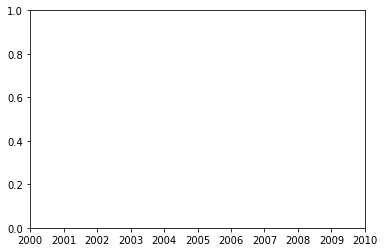

In [67]:
fig = plt.figure(figsize=(12,8))

plt.plot(sales.date, sales.loc[sales["SKU"]==24, "sales"], label="SKU24", linewidth=3)

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales of Different Items")

plt.show()

In [62]:
sales.loc[sales["SKU"]==24, "sales"]

date
2021-03-03    0.4
2021-03-04    NaN
2021-03-05    NaN
2021-03-06    NaN
2021-03-07    NaN
             ... 
2021-07-02    NaN
2021-07-03    NaN
2021-07-04    NaN
2021-07-05    NaN
2021-07-05    1.6
Name: sales, Length: 73388, dtype: float64

In [52]:
sales["SKU"]==24

date
2021-07-05    False
2021-07-05    False
2021-05-27    False
2021-05-28    False
2021-05-29    False
              ...  
2021-07-01    False
2021-07-02    False
2021-07-03    False
2021-07-04    False
2021-07-05    False
Name: SKU, Length: 4605985, dtype: bool

In [51]:
sales.head()

,ID,geoCluster,SKU,price,sales
date,,,,,
2021-07-05,RR27956459,92,32485,38.29,4.0
2021-07-05,RR27956474,92,32549,89.39,0.5
2021-05-27,RR27956489,112,32485,45.39,3.7
2021-05-28,RR27956490,112,32485,NaN,NaN
2021-05-29,RR27956491,112,32485,NaN,NaN
